In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import the MLPClassifier from neural_network from sklearn
from sklearn.neural_network import MLPClassifier
#import the pipeline from sklearn
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [41]:
ac = pd.read_csv('accidents_preprocessed.csv')
ac = ac.drop(columns=['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude'])
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1


### Preprocess Target class casualty_severity
#### -Note:  Fatal and Serious together in one class and slight in the other

In [42]:

ac['casualty_severity'] = ac['casualty_severity'].replace(2, 1)
ac['casualty_severity'] = ac['casualty_severity'].replace(3, 0)

ac[ac.casualty_severity == 1]

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
12,2,1,11,3,165.0,3,6,20,-1,4,...,0,0,1,1,7,1598,1,16,3,1
13,2,1,11,3,287.0,3,6,30,6,2,...,0,0,1,1,7,109,1,5,2,1
14,2,1,11,3,545.0,3,2,20,-1,4,...,0,0,4,1,6,124,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56314,1,3,7,7,30.0,3,6,60,0,-1,...,0,0,0,2,4,1400,1,15,7,3
56316,1,3,7,7,30.0,3,6,60,0,-1,...,0,0,0,2,4,1400,1,15,7,3
56318,2,1,7,7,960.0,-1,6,20,0,-1,...,0,0,3,2,9,1997,1,13,5,2
56322,1,1,7,7,1169.0,3,6,60,0,-1,...,0,0,1,1,8,998,1,20,10,1


In [43]:
one_hot_list = ['first_road_class', 'road_type', 'junction_detail', 'junction_control', 'light_conditions',
                'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
                'urban_or_rural_area', 'trunk_road_flag', 'casualty_class', 'sex_of_casualty', 'car_passenger',
                'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile', 'towing_and_articulation',
                'vehicle_manoeuvre', 'vehicle_location_restricted_lane', 'junction_location',
                'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
                'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver', 'propulsion_code',
                'driver_imd_decile', 'driver_home_area_type']

#Maybe change speed limit
ordinal_list = ['number_of_vehicles', 'number_of_casualties', 'month', 'day_of_week', 'time', 'speed_limit',
                'age_band_of_casualty', 'age_band_of_driver', 'engine_capacity_cc', 'age_of_vehicle']

In [44]:
#Reset the indices
ac = ac.reset_index(drop=True)

ac.head(n=10)

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1
5,2,1,11,2,970.0,-1,6,30,3,4,...,0,0,3,1,6,998,1,3,2,1
6,2,1,11,2,1226.0,4,6,20,3,2,...,0,0,1,1,7,125,1,0,5,1
7,1,1,11,2,1350.0,3,1,40,1,4,...,0,0,1,1,4,-1,-1,-1,6,1
8,2,1,11,2,1123.0,5,-1,30,0,-1,...,0,0,1,1,7,-1,-1,-1,-1,-1
9,2,1,11,2,1320.0,5,6,30,3,4,...,7,2,3,2,7,1499,2,2,1,1


In [45]:
accidents = ac.copy()
y = accidents['casualty_severity']
accidents = accidents.drop(columns=['casualty_severity'])



one_hot_encoder = OneHotEncoder(sparse =True)
scaler = StandardScaler()

# preprocess the features Outlook and Wind


encoded = pd.DataFrame(one_hot_encoder.fit_transform(accidents[one_hot_list]).toarray(),
                       columns=one_hot_encoder.get_feature_names(one_hot_list))
scaled = pd.DataFrame(scaler.fit_transform(accidents[ordinal_list]),#,
                       columns=ordinal_list)


#preprocessor = ColumnTransformer(
#    transformers=[
        # use StandardScaler for Temperature and Humidity
        #('scaler', StandardScaler(), ordinal_list),
        # use OneHotEncoder for Outlook and Wind
 #       ('encoder', OneHotEncoder(), one_hot_list)
  #      ])

# call fit_transform to see the result of applying the ColumnTransformer
#preprocessed = pd.DataFrame(preprocessor.fit_transform(accidents).toarray())
#display(preprocessed.head())

# define a pipeline that contains the ColumnTransformer
#pipeline = Pipeline([ ('preprocessing', preprocessor) ])
scaled

,number_of_vehicles,number_of_casualties,month,day_of_week,time,speed_limit,age_band_of_casualty,age_band_of_driver,engine_capacity_cc,age_of_vehicle
0,-0.049628,-0.682890,1.151915,-1.076702,1.165830,-1.409165,-0.613268,-0.826244,-1.112462,-0.563267
1,-0.049628,-0.682890,1.151915,-0.063924,-0.477850,-0.743147,-1.049346,-1.314595,-1.102348,-0.563267
2,-0.049628,-0.682890,1.151915,-1.076702,1.007908,-1.409165,0.258887,0.150457,-1.102348,-1.195186
3,-0.049628,-0.682890,1.151915,-1.076702,0.949896,-0.743147,0.258887,0.150457,-1.103191,-0.089328
4,-0.049628,-0.682890,1.151915,-1.076702,0.437454,-1.409165,-0.613268,-0.826244,-1.102348,-0.247308
...,...,...,...,...,...,...,...,...,...,...
56319,-0.049628,0.096962,0.064307,1.455245,0.721070,-1.409165,1.131043,1.127159,-0.366544,-0.879227
56320,-0.049628,0.096962,0.064307,1.455245,0.721070,-1.409165,-0.177190,0.150457,-0.366544,-1.037206
56321,-0.049628,-0.682890,0.064307,1.455245,0.666280,-0.743147,1.131043,1.127159,0.054878,-1.037206
56322,-1.354596,-0.682890,0.064307,1.455245,1.001462,1.254906,0.694965,0.638808,-0.366544,1.964407


In [46]:
accidents = accidents.drop(columns=one_hot_list)
accidents = accidents.drop(columns = ordinal_list)
accidents = accidents.join(encoded)
accidents = accidents.join(scaled)
accidents

,first_road_class_-1,first_road_class_1,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,road_type_-1,road_type_1,road_type_2,road_type_3,...,number_of_vehicles,number_of_casualties,month,day_of_week,time,speed_limit,age_band_of_casualty,age_band_of_driver,engine_capacity_cc,age_of_vehicle
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.049628,-0.682890,1.151915,-1.076702,1.165830,-1.409165,-0.613268,-0.826244,-1.112462,-0.563267
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.049628,-0.682890,1.151915,-0.063924,-0.477850,-0.743147,-1.049346,-1.314595,-1.102348,-0.563267
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.049628,-0.682890,1.151915,-1.076702,1.007908,-1.409165,0.258887,0.150457,-1.102348,-1.195186
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.049628,-0.682890,1.151915,-1.076702,0.949896,-0.743147,0.258887,0.150457,-1.103191,-0.089328
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.049628,-0.682890,1.151915,-1.076702,0.437454,-1.409165,-0.613268,-0.826244,-1.102348,-0.247308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.049628,0.096962,0.064307,1.455245,0.721070,-1.409165,1.131043,1.127159,-0.366544,-0.879227
56320,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.049628,0.096962,0.064307,1.455245,0.721070,-1.409165,-0.177190,0.150457,-0.366544,-1.037206
56321,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.049628,-0.682890,0.064307,1.455245,0.666280,-0.743147,1.131043,1.127159,0.054878,-1.037206
56322,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.354596,-0.682890,0.064307,1.455245,1.001462,1.254906,0.694965,0.638808,-0.366544,1.964407


# First Splits and Models

In [47]:
y

0        1
1        1
2        0
3        0
4        0
        ..
56319    0
56320    0
56321    0
56322    1
56323    1
Name: casualty_severity, Length: 56324, dtype: int64

In [48]:
accidents

,first_road_class_-1,first_road_class_1,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,road_type_-1,road_type_1,road_type_2,road_type_3,...,number_of_vehicles,number_of_casualties,month,day_of_week,time,speed_limit,age_band_of_casualty,age_band_of_driver,engine_capacity_cc,age_of_vehicle
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.049628,-0.682890,1.151915,-1.076702,1.165830,-1.409165,-0.613268,-0.826244,-1.112462,-0.563267
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.049628,-0.682890,1.151915,-0.063924,-0.477850,-0.743147,-1.049346,-1.314595,-1.102348,-0.563267
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.049628,-0.682890,1.151915,-1.076702,1.007908,-1.409165,0.258887,0.150457,-1.102348,-1.195186
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.049628,-0.682890,1.151915,-1.076702,0.949896,-0.743147,0.258887,0.150457,-1.103191,-0.089328
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.049628,-0.682890,1.151915,-1.076702,0.437454,-1.409165,-0.613268,-0.826244,-1.102348,-0.247308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.049628,0.096962,0.064307,1.455245,0.721070,-1.409165,1.131043,1.127159,-0.366544,-0.879227
56320,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.049628,0.096962,0.064307,1.455245,0.721070,-1.409165,-0.177190,0.150457,-0.366544,-1.037206
56321,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.049628,-0.682890,0.064307,1.455245,0.666280,-0.743147,1.131043,1.127159,0.054878,-1.037206
56322,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.354596,-0.682890,0.064307,1.455245,1.001462,1.254906,0.694965,0.638808,-0.366544,1.964407


In [49]:
#StandardScaling
#scaler = StandardScaler()
#scaler.fit_transform(accidents)

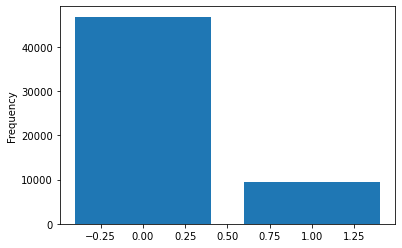

In [50]:
#Some Plots

#iris = pd.read_csv("iris_imbalanced.csv")


class_dist = y.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

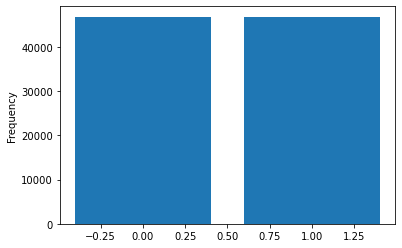

In [51]:
#Undersampling/Oversampling:

sampler = RandomOverSampler()
#sampler = RandomUnderSampler()
acc_balanced_data, acc_balanced_target = sampler.fit_resample(accidents, y)

class_dist = pd.Series(acc_balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(acc_balanced_data, acc_balanced_target, test_size=0.2, random_state=42, stratify=acc_balanced_target)

# Logistic Regression (Marc)

In [53]:
weight_estimator = LogisticRegression()
weight_estimator.fit(X_train,y_train)

C:\Users\AS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
predictions = weight_estimator.predict(X_test)
accuracy_score(y_test,predictions)

0.6928122000639864

In [55]:
f1_score(y_test,predictions)

0.6919745495375074

In [56]:
tn, fp, fn ,tp = confusion_matrix(y_test,predictions).ravel()

print("TP:" , tp)
print("FN:" , fn)
print("FP:" , fp)
print("TN:" , tn)

print("Precision: ",precision_score(y_test,predictions))
print("Recall: ", recall_score(y_test,predictions))


TP: 6471
FN: 2906
FP: 2855
TN: 6522
Precision:  0.6938666094788762
Recall:  0.6900927802068892


# Random Forrest Classifier (André)

In [57]:
#train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, random_state=1)
model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train, y_train)

In [58]:
pred = model.predict(X_test)
tn, fp, fn ,tp = confusion_matrix(y_test,pred).ravel()

print("TP:" , tp)
print("FN:" , fn)
print("FP:" , fp)
print("TN:" , tn)

print("Precision: ",precision_score(y_test,pred))
print("Recall: ", recall_score(y_test,pred))

TP: 9282
FN: 95
FP: 633
TN: 8744
Precision:  0.9361573373676249
Recall:  0.9898688279833635


In [59]:
#perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
#eli5.show_weights(perm, feature_names = X_test.columns.tolist())

# KNN (None)

In [60]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_train, y_train)
#NearestNeighbors(n_neighbors=2)
A = neigh.kneighbors_graph(accidents)

MemoryError: Unable to allocate 1.00 GiB for an array with shape (1789, 75014) and data type float64

# Neural Networks (Tolga)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu',
learning_rate_init=1e-3, batch_size=64, verbose=True,
early_stopping=True, random_state=1234)

In [ ]:
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

# EM / SVD / ... (Tobi)